In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle

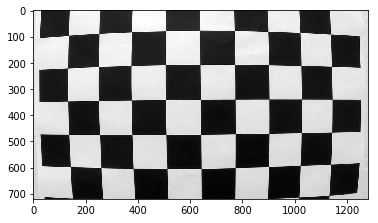

In [2]:
img = cv2.imread('calibration1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

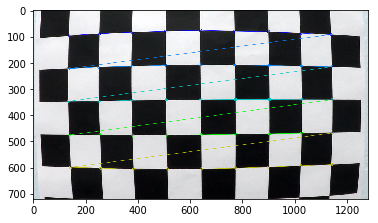

In [3]:
col, row = 9, 6
# col, row = 9, 5

### 1.1 ChessboardCorner를 검출
ret , corners = cv2.findChessboardCorners(gray,(col, row),None)

if ret == False:
    print('corners not found')

### 1.2 검출 된 코너를 corners_img에 표시
corners_img = cv2.drawChessboardCorners(img,(col, row),corners,ret) 
plt.imshow(corners_img)

In [4]:
# chess_points = np.zeros((col*row, 3), np.float32)
# chess_points[:,:2] = np.mgrid[0:col, 0:row].T.reshape(-1,2)

chess_point_list = []

### 빈 chess_point_list 의 list 변수에 초기값을 설정.
for i in range(row):
    for j in range(col):
        chess_point_list.append([j, i, 0])
        
chess_points = np.array(chess_point_list, dtype='float32')

In [5]:
img_size = (img.shape[1], img.shape[0])
### 1.3 calibrate 진행
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera([chess_points], [corners], img_size, None, None)

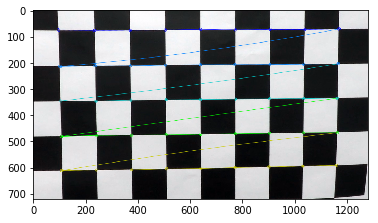

In [6]:
### calibration 된 값을 undist_img로 변환
undist_img = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(undist_img)

In [7]:
### calibraion 된 값들은 cam-cal.pkl 파일로 저장하여 다시 재사용가능.
cam_cal = {}
cam_cal["mtx"] = mtx
cam_cal["dist"] = dist
cam_cal["imagesize"] = img_size
pickle.dump(cam_cal, open("cam-cal.pkl", "wb"))